In [1]:
import pandas as pd, numpy as np, re
import os
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.datasets import load_svmlight_file
%load_ext autotime
from tqdm.auto import tqdm

import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go
pd.options.plotting.backend = "plotly"
pio.renderers.default = "jpeg"

time: 531 ms (started: 2021-05-06 16:46:17 -04:00)


In [2]:
def parse_data(filename):
    '''file parser taken from 
    https://github.com/david-cortes/contextualbandits'''
    with open(filename, "rb") as f:
        infoline = f.readline()
        infoline = re.sub(r"^b'", "", str(infoline))
        n_features = int(re.sub(r"^\d+\s(\d+)\s\d+.*$", r"\1", infoline))
        features, labels = load_svmlight_file(f, n_features=n_features, multilabel=True)
    mlb = MultiLabelBinarizer()
    labels = mlb.fit_transform(labels)
    features = np.array(features.todense())
    features = np.ascontiguousarray(features)
    return features, labels

time: 0 ns (started: 2021-05-06 16:46:18 -04:00)


In [3]:
def summarize_data(features, y):
    print('Shape of Y (nobs x covariates)')
    print(features.shape)
    print('\nShape of Y (nobs x actions)')
    print(y.shape)
    print('\nRange of Reward')
    print(np.unique(y))
    

time: 0 ns (started: 2021-05-06 16:46:18 -04:00)


## Bibtex

In [137]:
features, y = parse_data("../data/Bibtex_data.txt")
summarize_data(features, y)

Shape of Y (nobs x covariates)
(7395, 1836)

Shape of Y (nobs x actions)
(7395, 159)

Range of Reward
[0 1]
time: 547 ms (started: 2021-05-06 16:12:50 -04:00)


#### Rewards

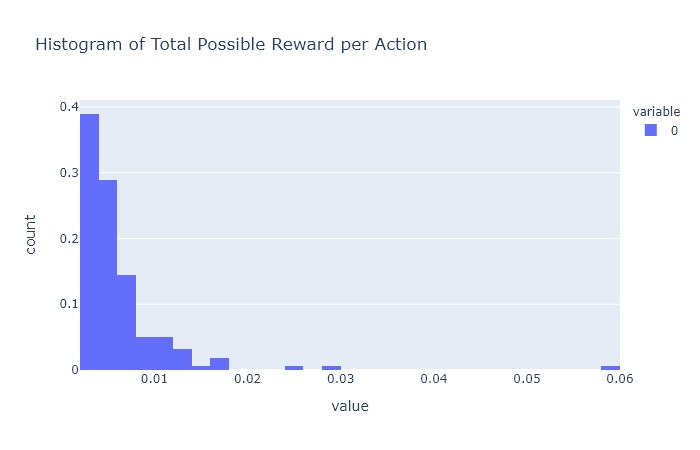

time: 141 ms (started: 2021-05-06 14:54:46 -04:00)


In [28]:
y = pd.DataFrame(y)

(y.sum()/y.sum().sum()).plot.hist(histnorm='probability', 
                                  title='Histogram of Total Possible Reward per Action'
                 )

In [30]:
y.sum(axis=1).describe()

count    7395.000000
mean        2.401893
std         1.691103
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        28.000000
dtype: float64

time: 31 ms (started: 2021-05-06 14:55:16 -04:00)


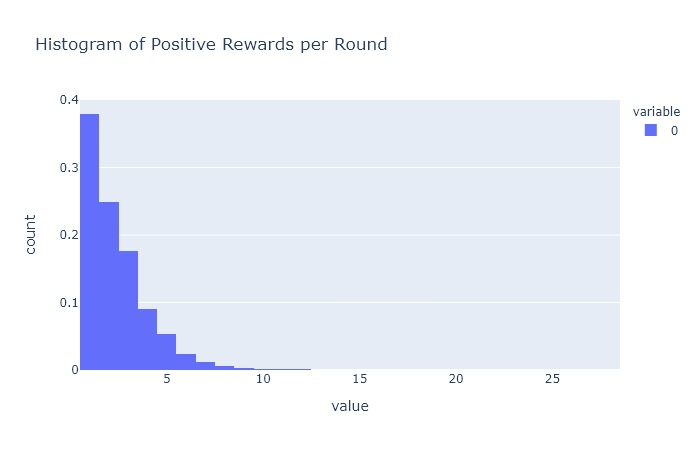

time: 203 ms (started: 2021-05-06 14:53:20 -04:00)


In [24]:
y.sum(axis=1).plot.hist(histnorm='probability', 
                        title='Histogram of Positive Rewards per Round')

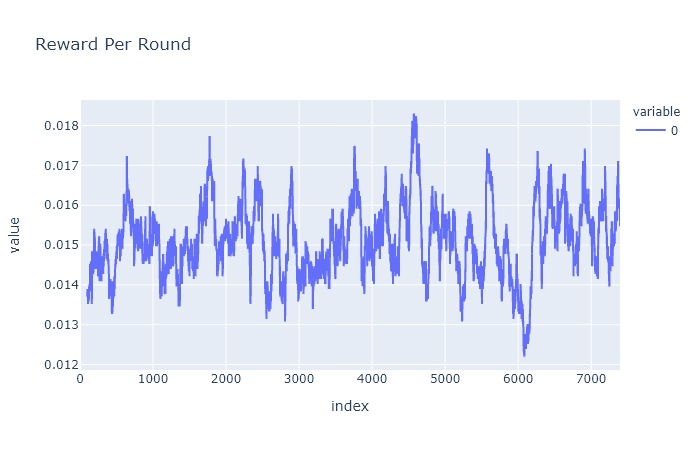

time: 641 ms (started: 2021-05-06 14:56:44 -04:00)


In [34]:
y.mean(axis=1).rolling(100).mean().plot.line(title='Average Reward Per Round')

#### Features/Covariates

+ All features are binary (0,1)
+ There are some features with perfect overlap

In [138]:
X = pd.DataFrame(features)

time: 15 ms (started: 2021-05-06 16:12:56 -04:00)


In [139]:
X.apply(lambda z: len(z.value_counts()), axis=0).describe()

count    1836.0
mean        2.0
std         0.0
min         2.0
25%         2.0
50%         2.0
75%         2.0
max         2.0
dtype: float64

time: 1.62 s (started: 2021-05-06 16:13:00 -04:00)


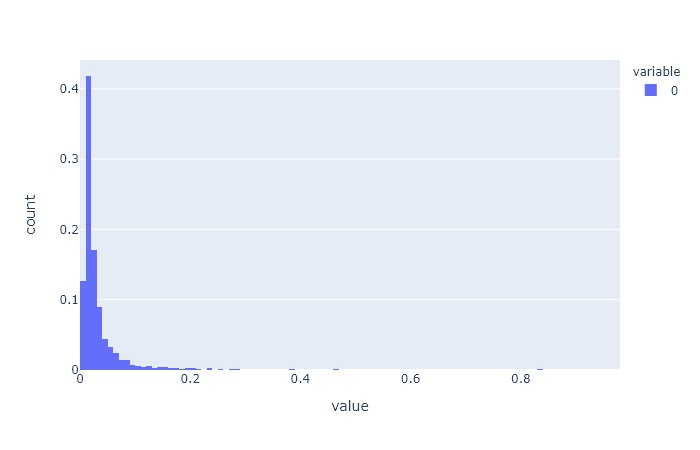

time: 234 ms (started: 2021-05-06 15:00:14 -04:00)


In [42]:
X.mean().plot.hist(histnorm='probability')

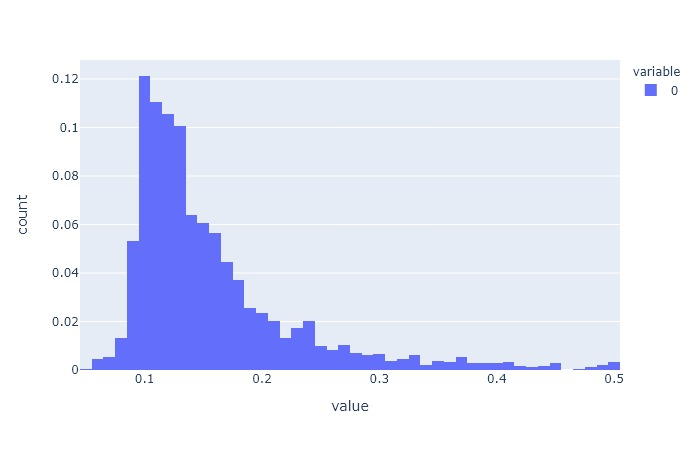

time: 407 ms (started: 2021-05-06 15:00:31 -04:00)


In [43]:
X.std().plot.hist(histnorm='probability')

In [111]:
X_corr = X.corr()

time: 1min 9s (started: 2021-05-06 15:36:09 -04:00)


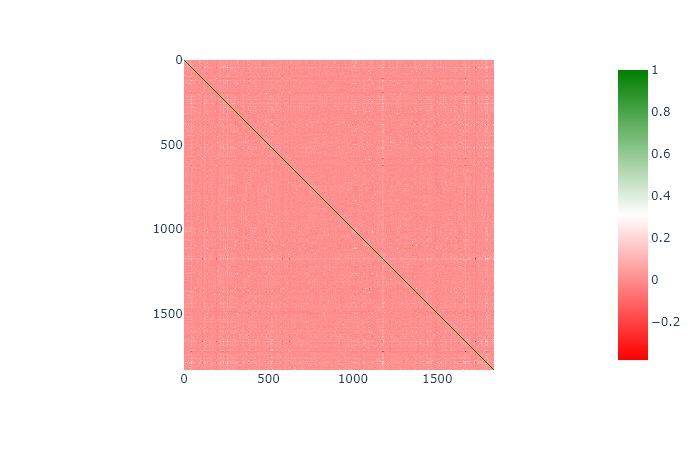

time: 15.8 s (started: 2021-05-06 15:02:44 -04:00)


In [46]:
px.imshow(X_corr, color_continuous_scale=["red", "white", "green"])

In [112]:
X_corr.values[np.arange(len(X_corr)), np.arange(len(X_corr))]=np.nan

time: 0 ns (started: 2021-05-06 15:37:26 -04:00)


In [113]:
X_corr.unstack().describe()

count    3.369060e+06
mean     8.727522e-03
std      2.737366e-02
min     -3.824321e-01
25%     -8.678747e-03
50%      3.895258e-03
75%      1.968321e-02
max      1.000000e+00
dtype: float64

time: 313 ms (started: 2021-05-06 15:37:27 -04:00)


In [114]:
abs(X_corr.unstack()).describe()

count    3.369060e+06
mean     1.819308e-02
std      2.223732e-02
min      6.757776e-19
25%      6.350964e-03
50%      1.259767e-02
75%      2.242082e-02
max      1.000000e+00
dtype: float64

time: 328 ms (started: 2021-05-06 15:37:28 -04:00)


## Delicious

In [142]:
features, y = parse_data("../data/Delicious_data.txt")
summarize_data(features, y)

Shape of Y (nobs x covariates)
(16105, 500)

Shape of Y (nobs x actions)
(16105, 983)

Range of Reward
[0 1]
time: 906 ms (started: 2021-05-06 16:13:38 -04:00)


#### Rewards

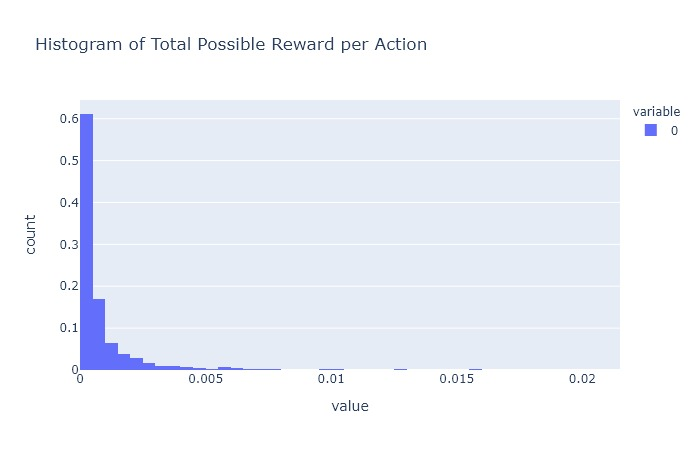

time: 266 ms (started: 2021-05-06 15:25:34 -04:00)


In [72]:
y = pd.DataFrame(y)

(y.sum()/y.sum().sum()).plot.hist(histnorm='probability', 
                                  title='Histogram of Total Possible Reward per Action'
                 )

In [73]:
y.sum(axis=1).describe()

count    16105.000000
mean        19.019994
std          5.071873
min          0.000000
25%         17.000000
50%         20.000000
75%         23.000000
max         25.000000
dtype: float64

time: 94 ms (started: 2021-05-06 15:25:40 -04:00)


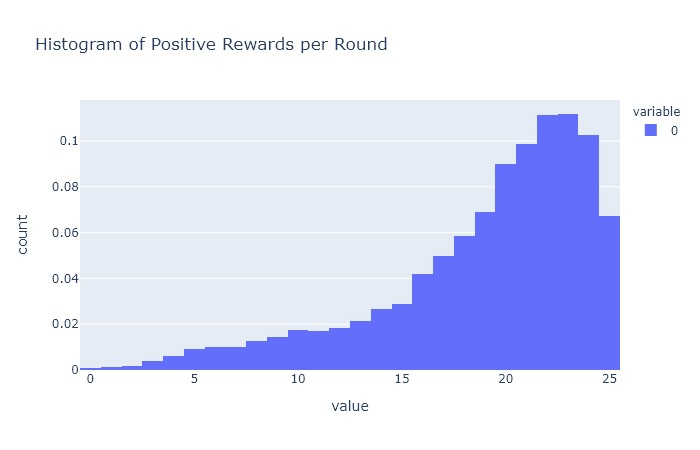

time: 312 ms (started: 2021-05-06 15:25:47 -04:00)


In [74]:
y.sum(axis=1).plot.hist(histnorm='probability', 
                        title='Histogram of Positive Rewards per Round')

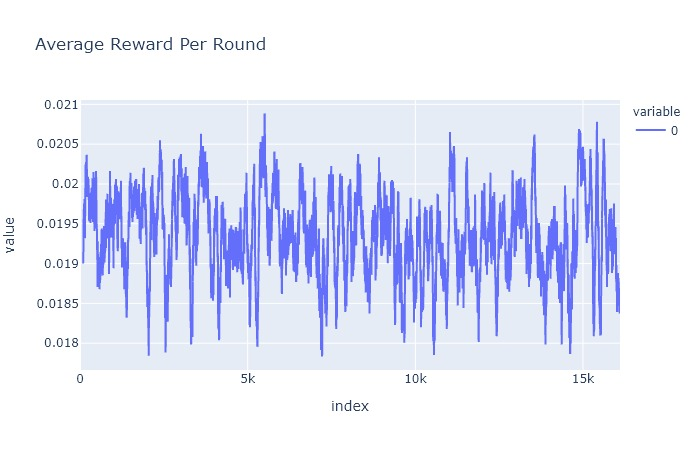

time: 1.19 s (started: 2021-05-06 15:26:03 -04:00)


In [75]:
y.mean(axis=1).rolling(100).mean().plot.line(title='Average Reward Per Round')

#### Features/Covariates

+ All features are binary (0,1)
+ There are some features with perfect overlap

In [143]:
X = pd.DataFrame(features)

time: 47 ms (started: 2021-05-06 16:13:47 -04:00)


In [144]:
X.apply(lambda z: len(z.value_counts()), axis=0).describe()

count    500.0
mean       2.0
std        0.0
min        2.0
25%        2.0
50%        2.0
75%        2.0
max        2.0
dtype: float64

time: 735 ms (started: 2021-05-06 16:13:51 -04:00)


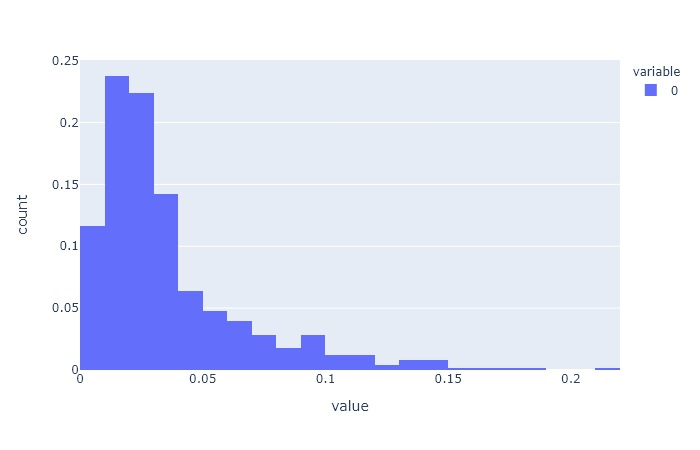

time: 297 ms (started: 2021-05-06 15:26:52 -04:00)


In [78]:
X.mean().plot.hist(histnorm='probability')

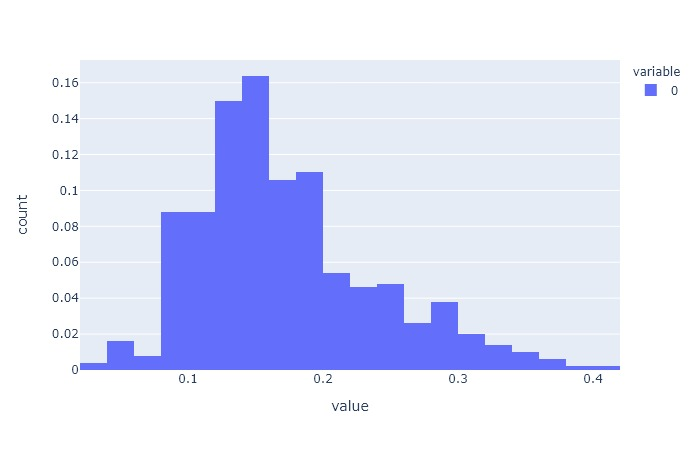

time: 375 ms (started: 2021-05-06 15:27:05 -04:00)


In [79]:
X.std().plot.hist(histnorm='probability')

In [105]:
X_corr = X.corr()

time: 12.7 s (started: 2021-05-06 15:34:38 -04:00)


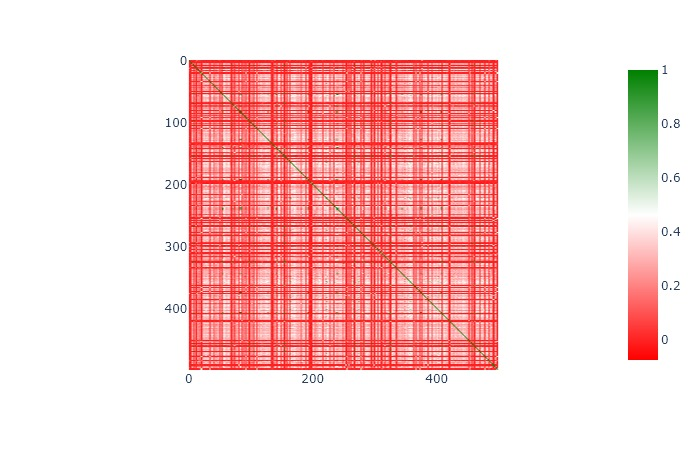

time: 1.8 s (started: 2021-05-06 15:27:45 -04:00)


In [81]:
px.imshow(X_corr, color_continuous_scale=["red", "white", "green"])

In [106]:
# flatten diagnol to 0
X_corr.values[np.arange(len(X_corr)), np.arange(len(X_corr))]=np.nan

time: 0 ns (started: 2021-05-06 15:34:51 -04:00)


In [107]:
X_corr.unstack().describe()

count    249500.000000
mean          0.181950
std           0.176640
min          -0.076070
25%          -0.004037
50%           0.215746
75%           0.322920
max           1.000000
dtype: float64

time: 62 ms (started: 2021-05-06 15:34:51 -04:00)


In [108]:
abs(X_corr.unstack()).describe()

count    249500.000000
mean          0.189503
std           0.168511
min           0.000002
25%           0.015714
50%           0.215746
75%           0.322920
max           1.000000
dtype: float64

time: 47 ms (started: 2021-05-06 15:34:51 -04:00)


## Mediamill

In [131]:
features, y = parse_data("../data/Mediamill_data.txt")
summarize_data(features, y)

Shape of Y (nobs x covariates)
(43907, 120)

Shape of Y (nobs x actions)
(43907, 101)

Range of Reward
[0 1]
time: 4.8 s (started: 2021-05-06 16:11:27 -04:00)


#### Rewards

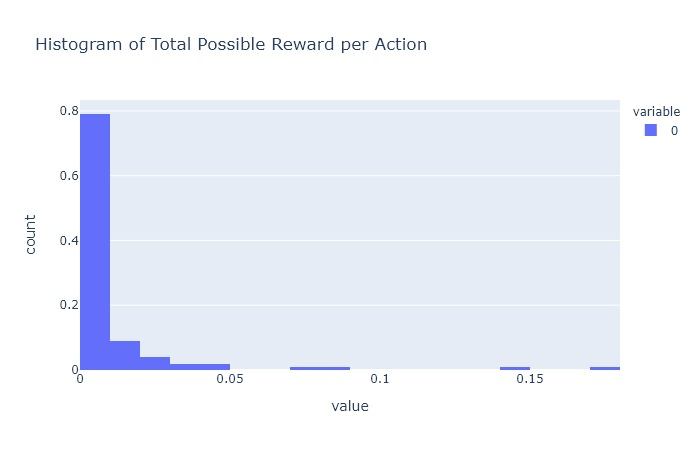

time: 234 ms (started: 2021-05-06 16:11:51 -04:00)


In [132]:
y = pd.DataFrame(y)

(y.sum()/y.sum().sum()).plot.hist(histnorm='probability', 
                                  title='Histogram of Total Possible Reward per Action')

In [88]:
y.sum(axis=1).describe()

count    43907.000000
mean         4.375567
std          2.333817
min          0.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         18.000000
dtype: float64

time: 32 ms (started: 2021-05-06 15:30:37 -04:00)


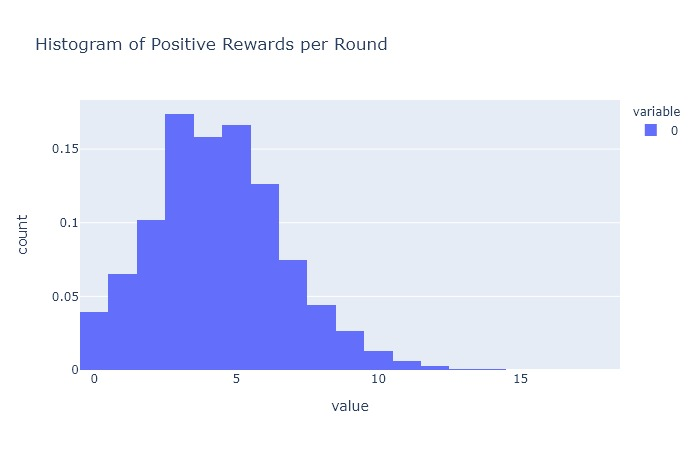

time: 531 ms (started: 2021-05-06 15:30:38 -04:00)


In [89]:
y.sum(axis=1).plot.hist(histnorm='probability', 
                        title='Histogram of Positive Rewards per Round')

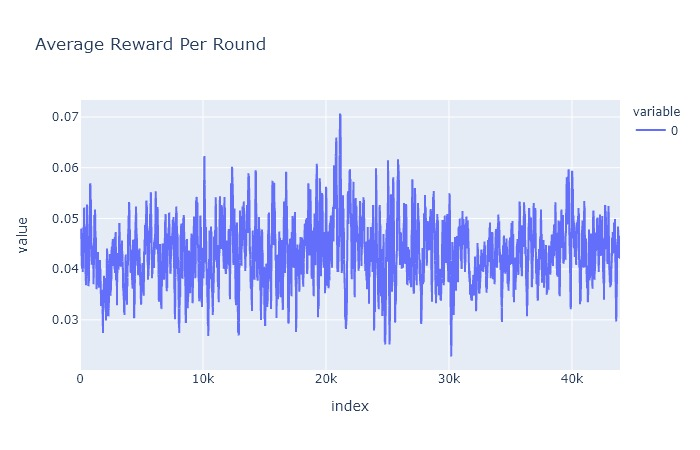

time: 2.05 s (started: 2021-05-06 15:30:41 -04:00)


In [90]:
y.mean(axis=1).rolling(100).mean().plot.line(title='Average Reward Per Round')

#### Features/Covariates

+ All features are positive and continuous
+ There are some features with near perfect correlation
+ There is substantially more correlation between the variables (as compared to the other datasets)

In [133]:
X = pd.DataFrame(features)

time: 0 ns (started: 2021-05-06 16:12:06 -04:00)


In [121]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,0.38088,0.49408,0.54001,0.42293,0.15832,0.32698,0.39086,0.52712,0.25405,0.22373,...,0.59365,0.55153,0.57439,0.51103,0.46400,0.20203,0.49234,0.31798,0.54781,0.39378
1,0.44957,0.46049,0.45347,0.41078,0.23176,0.40215,0.34959,0.53646,0.31812,0.30162,...,0.62746,0.53956,0.63861,0.49637,0.48099,0.19959,0.53508,0.32383,0.57149,0.39756
2,0.41680,0.54900,0.52085,0.46541,0.18160,0.35725,0.38935,0.53019,0.29094,0.24452,...,0.60467,0.55736,0.57135,0.56510,0.49771,0.25266,0.54676,0.34651,0.58960,0.43014
3,0.50199,0.48082,0.43554,0.43200,0.25060,0.40835,0.35782,0.49919,0.35317,0.32762,...,0.60761,0.54337,0.56642,0.52632,0.48449,0.18691,0.56472,0.32596,0.57837,0.39877
4,0.50682,0.48756,0.44496,0.41937,0.24502,0.40251,0.36114,0.49052,0.35760,0.32960,...,0.60509,0.54582,0.56814,0.59172,0.54498,0.28807,0.61467,0.45974,0.63770,0.51342


time: 63 ms (started: 2021-05-06 15:39:20 -04:00)


In [124]:
feat_card = X.apply(lambda z: len(z.value_counts()), axis=0)

time: 907 ms (started: 2021-05-06 16:09:41 -04:00)


In [128]:
(feat_card<1000).sum()

0

time: 16 ms (started: 2021-05-06 16:10:20 -04:00)


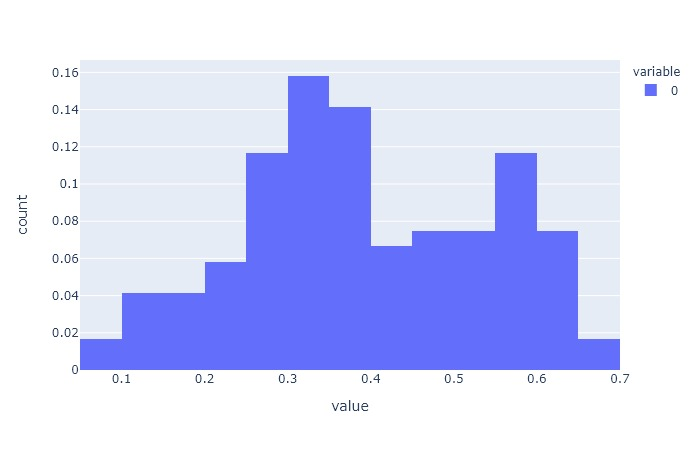

time: 234 ms (started: 2021-05-06 15:31:14 -04:00)


In [93]:
X.mean().plot.hist(histnorm='probability')

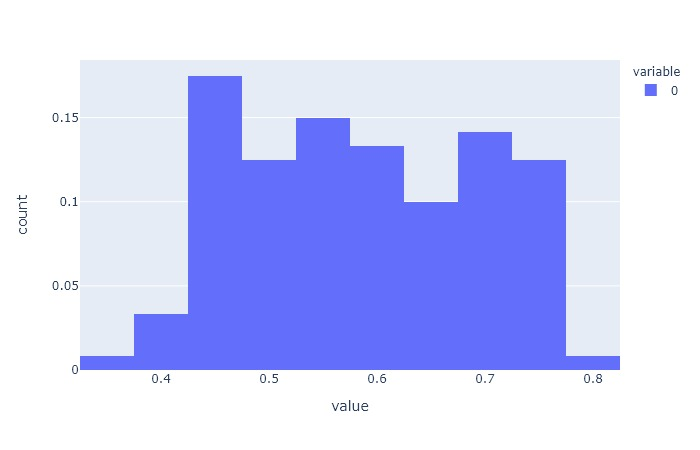

time: 203 ms (started: 2021-05-06 16:10:49 -04:00)


In [129]:
X.max().plot.hist(histnorm='probability')

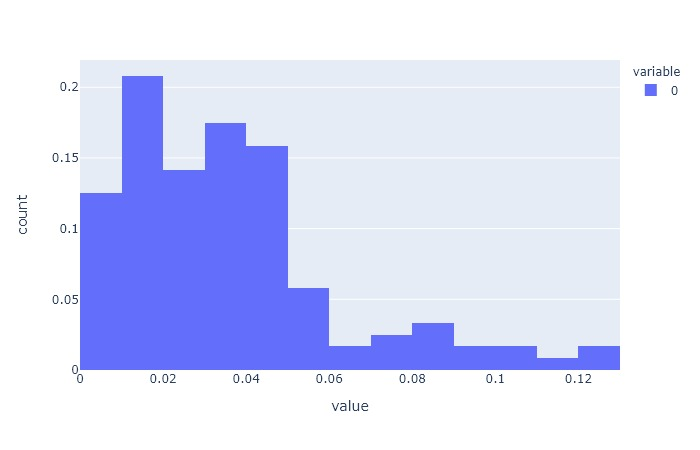

time: 234 ms (started: 2021-05-06 16:10:58 -04:00)


In [130]:
X.min().plot.hist(histnorm='probability')

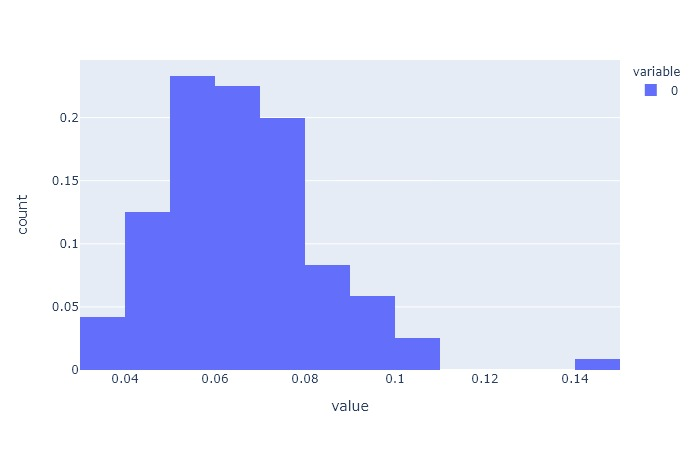

time: 297 ms (started: 2021-05-06 15:31:18 -04:00)


In [94]:
X.std().plot.hist(histnorm='probability')

In [117]:
X_corr = X.corr()

time: 2.06 s (started: 2021-05-06 15:38:49 -04:00)


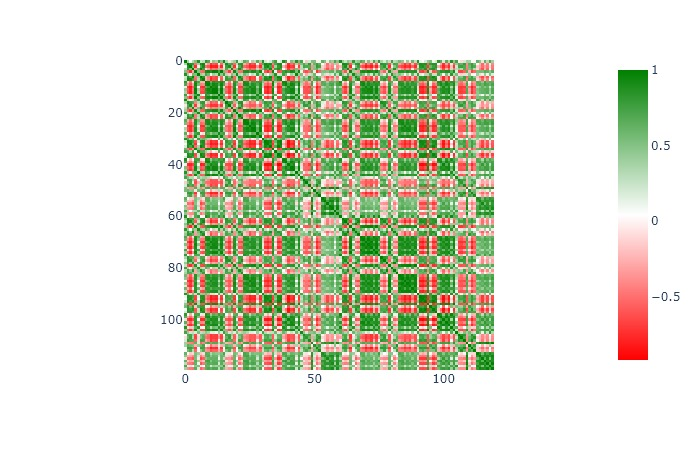

time: 437 ms (started: 2021-05-06 15:31:47 -04:00)


In [96]:
px.imshow(X_corr, color_continuous_scale=["red", "white", "green"])

In [118]:
X_corr.values[np.arange(len(X_corr)), np.arange(len(X_corr))]=np.nan

time: 0 ns (started: 2021-05-06 15:38:52 -04:00)


In [119]:
X_corr.unstack().describe()

count    14280.000000
mean         0.215689
std          0.552480
min         -0.922090
25%         -0.317971
50%          0.365977
75%          0.711189
max          0.999286
dtype: float64

time: 32 ms (started: 2021-05-06 15:38:53 -04:00)


In [120]:
abs(X_corr.unstack()).describe()

count    14280.000000
mean         0.535654
std          0.254587
min          0.000044
25%          0.343136
50%          0.564191
75%          0.738671
max          0.999286
dtype: float64

time: 62 ms (started: 2021-05-06 15:38:54 -04:00)


## Eurlex

In [4]:
features, y = parse_data("../data/Eurlex_data.txt")
summarize_data(features, y)

Shape of Y (nobs x covariates)
(19348, 5000)

Shape of Y (nobs x actions)
(19348, 3956)

Range of Reward
[0 1]
time: 5.36 s (started: 2021-05-06 16:46:27 -04:00)


#### Rewards

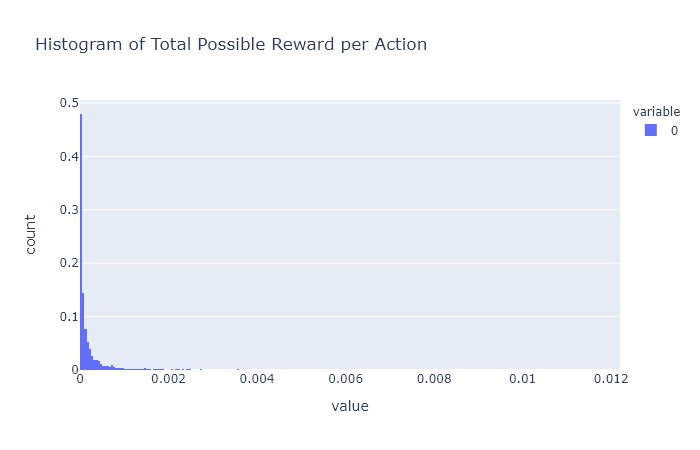

time: 484 ms (started: 2021-05-06 16:15:37 -04:00)


In [150]:
y = pd.DataFrame(y)

(y.sum()/y.sum().sum()).plot.hist(histnorm='probability', 
                                  title='Histogram of Total Possible Reward per Action')

In [151]:
y.sum(axis=1).describe()

count    19348.000000
mean         5.310161
std          1.371722
min          0.000000
25%          5.000000
50%          6.000000
75%          6.000000
max         24.000000
dtype: float64

time: 156 ms (started: 2021-05-06 16:15:41 -04:00)


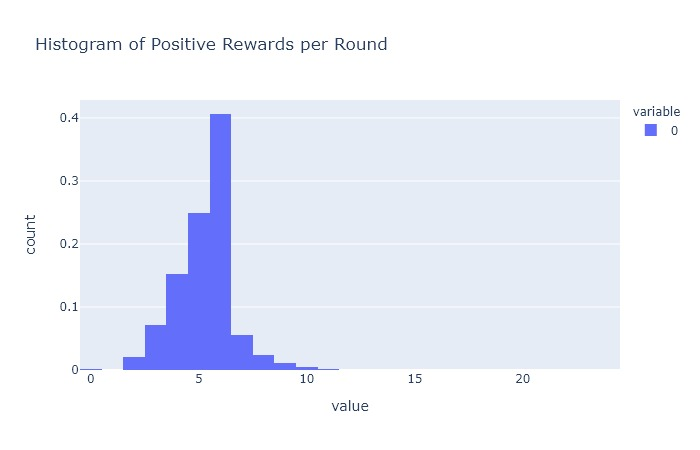

time: 500 ms (started: 2021-05-06 16:15:43 -04:00)


In [152]:
y.sum(axis=1).plot.hist(histnorm='probability', 
                        title='Histogram of Positive Rewards per Round')

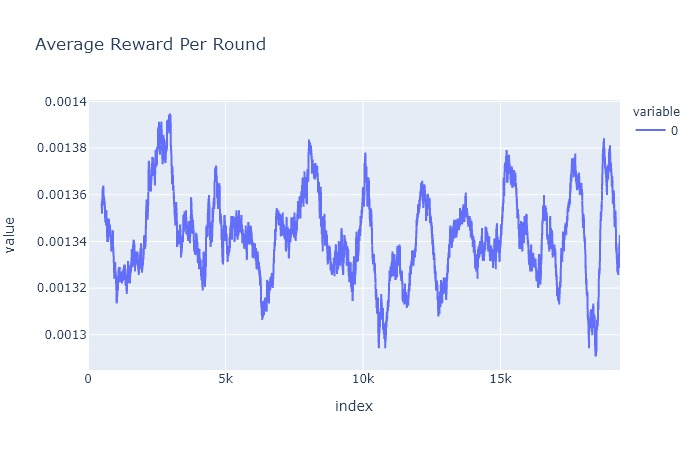

time: 1.64 s (started: 2021-05-06 16:15:55 -04:00)


In [153]:
y.mean(axis=1).rolling(500).mean().plot.line(title='Average Reward Per Round')

#### Features/Covariates

+ Mix of binary, discrete and continuous variables (All are still positive)
+ Too many features to compute full correlation matrix so we sample (n=500)
+ There is substantially more correlation between the variables (as compared to the other datasets)

In [5]:
X = pd.DataFrame(features)

time: 0 ns (started: 2021-05-06 16:46:36 -04:00)


In [155]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.084556,0.138594,0.094304,0.195764,0.612552,0.106491,0.137765,0.145839,0.304610,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.050734,0.762265,0.754431,0.065255,0.350030,0.000000,0.137765,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.101468,0.138594,0.377215,0.130509,0.175015,0.745434,0.137765,1.020873,1.218441,0.309297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.186024,0.346484,0.141456,0.195764,0.262522,0.425962,0.551062,0.437517,0.609220,0.618594,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.135290,0.277187,0.141456,0.065255,1.137597,0.106491,0.137765,0.583356,0.152305,0.154649,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


time: 31 ms (started: 2021-05-06 16:16:02 -04:00)


In [156]:
feat_card = X.apply(lambda z: len(z.value_counts()), axis=0)

time: 8.69 s (started: 2021-05-06 16:16:10 -04:00)


In [161]:
# Use this to check for boolean/discrete and continuous variables
(feat_card<=2).sum()

25

time: 0 ns (started: 2021-05-06 16:16:57 -04:00)


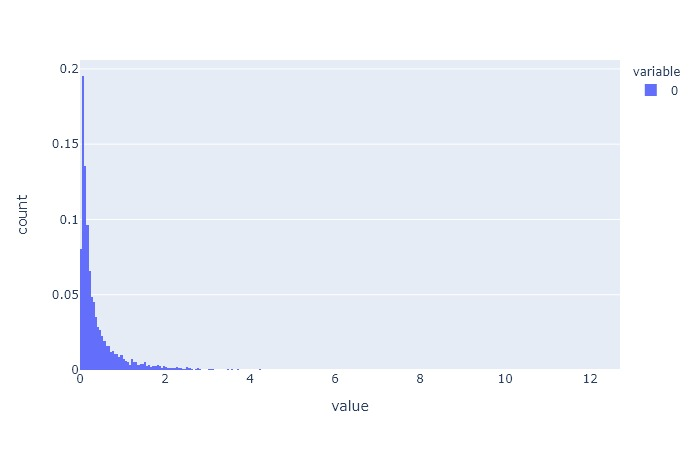

time: 1.05 s (started: 2021-05-06 16:17:54 -04:00)


In [162]:
X.mean().plot.hist(histnorm='probability')

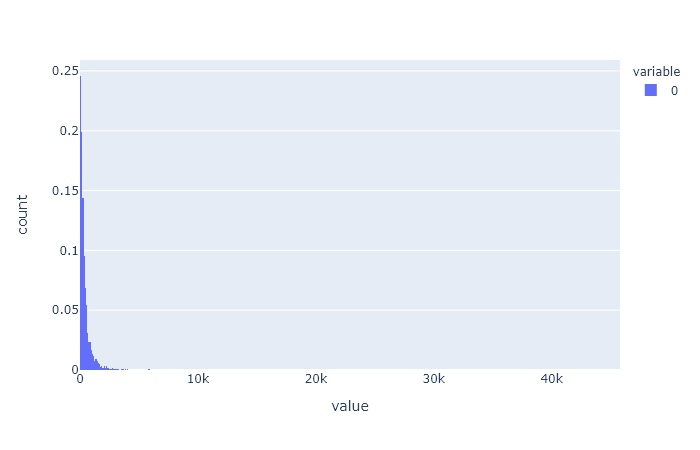

time: 1.12 s (started: 2021-05-06 16:17:59 -04:00)


In [163]:
X.max().plot.hist(histnorm='probability')

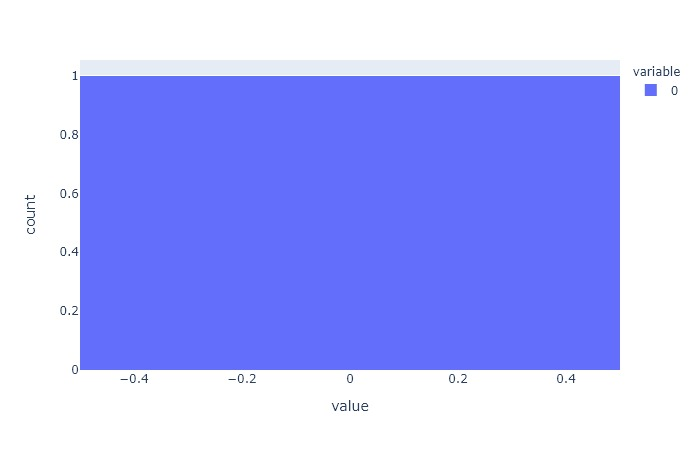

time: 922 ms (started: 2021-05-06 16:18:03 -04:00)


In [164]:
X.min().plot.hist(histnorm='probability')

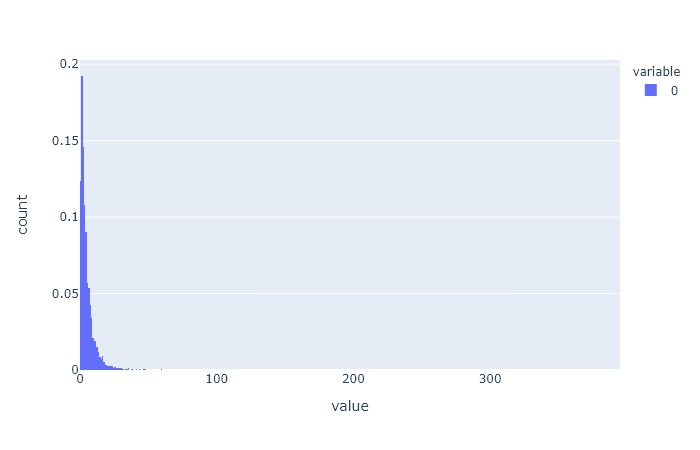

time: 2.28 s (started: 2021-05-06 16:18:38 -04:00)


In [165]:
X.std().plot.hist(histnorm='probability')

In [7]:
X_corr = X.sample(500, axis=1).corr()

time: 13.9 s (started: 2021-05-06 16:47:15 -04:00)


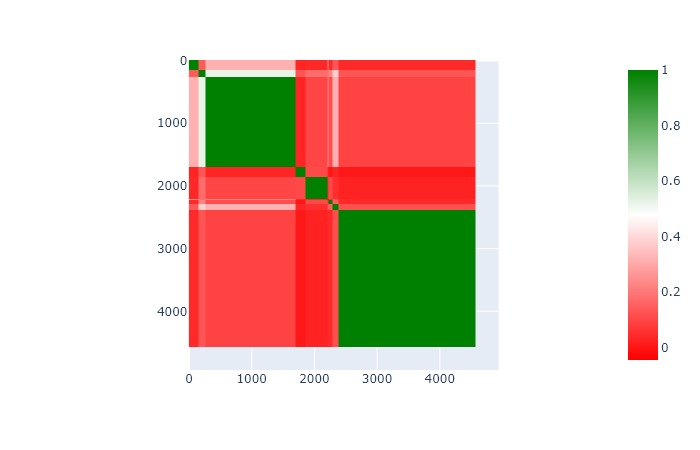

time: 6.12 s (started: 2021-05-06 16:47:32 -04:00)


In [8]:
px.imshow(X_corr, color_continuous_scale=["red", "white", "green"])

In [9]:
X_corr.values[np.arange(len(X_corr)), np.arange(len(X_corr))]=np.nan

time: 0 ns (started: 2021-05-06 16:47:38 -04:00)


In [10]:
X_corr.unstack().describe()

count    249500.000000
mean          0.046440
std           0.076878
min          -0.045650
25%           0.002405
50%           0.017606
75%           0.057618
max           0.976823
dtype: float64

time: 78 ms (started: 2021-05-06 16:47:38 -04:00)


In [11]:
abs(X_corr.unstack()).describe()

count    2.495000e+05
mean     4.711259e-02
std      7.646818e-02
min      8.423344e-08
25%      3.314071e-03
50%      1.765825e-02
75%      5.761821e-02
max      9.768232e-01
dtype: float64

time: 47 ms (started: 2021-05-06 16:47:38 -04:00)


### Extension Datasets
IGNORE SECTION FOR NOW, UNLIKELY TO HAVE TIME

#### RCV1

In [29]:
# https://scikit-learn.org/0.18/datasets/rcv1.html

In [26]:
from sklearn.datasets import fetch_rcv1

In [72]:
rcv1 = fetch_rcv1()
features = rcv1.data
y = rcv1.target
summarize_data(features, y)

Shape of Y (nobs x covariates)
(804414, 47236)

Shape of Y (nobs x actions)
(804414, 103)

Range of Reward
[<804414x103 sparse matrix of type '<class 'numpy.uint8'>'
	with 2606875 stored elements in Compressed Sparse Row format>]
time: 6.44 s (started: 2021-05-03 15:21:36 -04:00)


In [73]:
features, y = parse_data("../data/Rcv1_test.txt")

MemoryError: Unable to allocate 54.9 GiB for an array with shape (155962, 47236) and data type float64

time: 9.3 s (started: 2021-05-03 15:23:30 -04:00)
